<a href="https://colab.research.google.com/github/paritosh22/Sentiment-Analysis-of-Restaurent-Reviewst/blob/main/Restaurant_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

import numpy as np
import pandas as pd

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [7]:
data=pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)


In [8]:
data.shape

(1000, 2)

In [10]:
data.columns

Index(['Review', 'Liked'], dtype='object')

In [11]:
data.head()


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [12]:
data.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [13]:
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [14]:
data['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

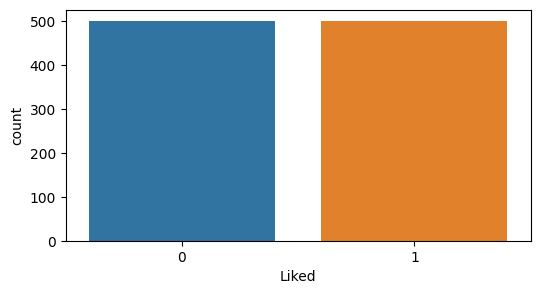

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
sns.countplot(x=data.Liked);


In [16]:
data.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [17]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
corpus = []

# Assuming 'data' is a DataFrame with a 'Review' column
for i in range(0, 1000):
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=data['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

# Display the first few preprocessed reviews
for i in range(5):
    print(corpus[i])


wow love place
crust good
tasti textur nasti
stop late may bank holiday rick steve recommend love
select menu great price


In [19]:
corpus[0:15]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair']

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X =cv.fit_transform(corpus).toarray()
y = data.iloc[:,1].values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.20, random_state=0)

In [22]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

In [23]:
#Model 1 [Multinomial Navie Bayes]
from sklearn.naive_bayes import MultinomialNB

classifier =MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [24]:
y_pred = classifier.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [25]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

score1 =accuracy_score(y_test,y_pred)
score2 = accuracy_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)

print("---------SCORES----------")
print("Accuracy score is {}%".format(round(score1*100,3)))
print("Precision score is {}%".format(round(score2*100,3)))
print("recall score is {}%".format(round(score3*100,3)))
print("-------------------------")
acc_s = accuracy_score(y_test, y_pred)*100
print("Accuracy Score of MultinomialNB Model {} %".format(round(acc_s,3)))

---------SCORES----------
Accuracy score is 76.5%
Precision score is 76.5%
recall score is 78.641%
-------------------------
Accuracy Score of MultinomialNB Model 76.5 %


In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [27]:
cm

array([[72, 25],
       [22, 81]])

Text(95.72222222222221, 0.5, 'Actual Values')

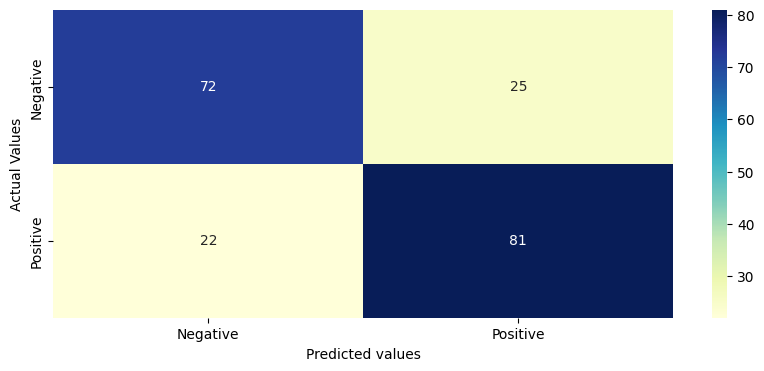

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize =(10,4))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')

In [29]:
from ssl import ALERT_DESCRIPTION_HANDSHAKE_FAILURE
best_accuracy =0.0
alpha_val =0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier =MultinomialNB(alpha=i)
  temp_classifier.fit(X_train,y_train)
  temp_y_pred =temp_classifier.predict(X_test)
  score = accuracy_score(y_test,temp_y_pred)
  print("Accuracy Score for alpha={} is {}%".format(round(i,1),round(score*100,3)))
  if score>best_accuracy:
     best_accuracy=score
     alpha_val =i
print('----------------------------------------------------')
print("The Best Accuracy Score is {}% with alpha value as {}".format(round(best_accuracy*100, 2), round(alpha_val, 3)))

Accuracy Score for alpha=0.1 is 78.0%
Accuracy Score for alpha=0.2 is 78.5%
Accuracy Score for alpha=0.3 is 78.0%
Accuracy Score for alpha=0.4 is 78.0%
Accuracy Score for alpha=0.5 is 77.5%
Accuracy Score for alpha=0.6 is 77.5%
Accuracy Score for alpha=0.7 is 77.5%
Accuracy Score for alpha=0.8 is 77.0%
Accuracy Score for alpha=0.9 is 76.5%
Accuracy Score for alpha=1.0 is 76.5%
----------------------------------------------------
The Best Accuracy Score is 78.5% with alpha value as 0.2


In [30]:
classifier =MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()

param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],  # List of alpha values to try
}
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_nb_classifier = MultinomialNB(alpha=best_params['alpha'])
best_nb_classifier.fit(X_train, y_train)
y_pred = best_nb_classifier.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'alpha': 0.5}
Accuracy: 77.5
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        97
           1       0.77      0.80      0.78       103

    accuracy                           0.78       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.78      0.77       200



In [32]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)

    temp = cv.transform([final_review]).toarray()
    return classifier.predict(temp)

In [33]:
sample_review ='fantastic food.'  #Eg 1

if predict_sentiment(sample_review):
  print("Positive review")

else:
  print("Negative review")

Positive review


In [34]:
sample_review ='Great food and hospitality '    #Eg 2

if predict_sentiment(sample_review):
  print(" Positive review")

else:
  print(" Negative review")

 Positive review


In [35]:
sample_review ='I am not impressed'  #Eg 3

if predict_sentiment(sample_review):
  print("This is a Positive review")

else:
  print("This is a Negative review")

This is a Negative review


In [36]:
sample_review ='Unbelievable'  #Eg 4

if predict_sentiment(sample_review):
  print("This is a Positive review")

else:
  print("This is a Negative review")

This is a Positive review


In [37]:
# Model 2 [RandomForestClassifier]
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=43)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=43)

In [38]:
y_pred = rf_classifier.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix
confusion_m= confusion_matrix(y_test,y_pred)
print(confusion_m)

[[87 10]
 [46 57]]


In [40]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, y_pred)
print("Best Accuracy for Random Foreast =",accuracy*100)

Best Accuracy for Random Foreast = 72.0


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}

rf_classifier = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Best Accuracy for Random Foreast: ", accuracy*100,'%')


Best Accuracy for Random Foreast:  74.5 %


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_classifier = DecisionTreeClassifier(random_state=43)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_dt_classifier = grid_search.best_estimator_
y_pred = best_dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("DecisionTreeClassifier Accuracy:", accuracy*100,'%')


DecisionTreeClassifier Accuracy: 72.0 %
